In [1]:
# This is one of the most difficult challenge that I have faced 
# because I do have no experience of data analysis in bioinfomatics.
#
# So, naturally, I need to look up the internet to find out how to handle the dna sequence.
# 
# Here is the website that I have gained the information:
# https://www.kaggle.com/thomasnelson/working-with-dna-sequence-data-for-ml
# https://www.kaggle.com/thomasnelson/working-with-dna-sequence-data-for-ml-part-2

In [2]:
# Set up the working directory
import os
os.chdir("F:/code_challenge")
os.getcwd()

'F:\\code_challenge'

In [3]:
# Check contents in the directory
os.listdir()

['code_challenge.pdf',
 'splice.data',
 'splice.txt',
 'sejioh_code_challenge.ipynb',
 'sejioh_dna_data_sequence.ipynb']

In [4]:
# Prerequites
import numpy as np
import pandas as pd
import re

import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Set the plotting enviroment
%matplotlib inline
matplotlib.style.use('ggplot')

In [6]:
# Upload the dataset
data = pd.read_csv('splice.data', names=['classes', 'donor_numbers', 'DNA_sequences'])
data.head()

,classes,donor_numbers,DNA_sequences
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...


In [7]:
# Convert the DNA sequences to lowercase letters
# and strip whitespaces
# and change any non 'acgt' characters to 'n'
# to encode each nucleotide characters as an ordinal values

my_sequence = (pd.DataFrame(data[['DNA_sequences']]))['DNA_sequences']
data['DNA_sequences'] = my_sequence.str.strip()
data['DNA_sequences'] = my_sequence.str.lower()

data.head()

,classes,donor_numbers,DNA_sequences
0,EI,ATRINS-DONOR-521,ccagctgcatcacaggaggccagcgagcagg...
1,EI,ATRINS-DONOR-905,agacccgccgggaggcggaggacctgcaggg...
2,EI,BABAPOE-DONOR-30,gaggtgaaggacgtccttccccaggagccgg...
3,EI,BABAPOE-DONOR-867,gggctgcgttgctggtcacattcctggcaggt...
4,EI,BABAPOE-DONOR-2817,gctcagcccccaggtcacccaggaactgacgtg...


In [8]:
# Define a function to collect all possible overlapping k-mers of specified length
# from any sequence string, default size = 6.
def getKmers(sequence, size=6):
    return [sequence[x:x+size] for x in range(len(sequence)- size + 1)]

In [9]:
# Convert the training data sequences into short overlapping k-mers of length 4.
data['words'] = data.apply(lambda x: getKmers(x['DNA_sequences']), axis=1)
data = data.drop('DNA_sequences', axis=1)

In [10]:
data.head()

,classes,donor_numbers,words
0,EI,ATRINS-DONOR-521,"[ , , , , , ..."
1,EI,ATRINS-DONOR-905,"[ , , , , , ..."
2,EI,BABAPOE-DONOR-30,"[ , , , , , ..."
3,EI,BABAPOE-DONOR-867,"[ , , , , , ..."
4,EI,BABAPOE-DONOR-2817,"[ , , , , , ..."


In [11]:
data_texts = list(data['words'])

for item in range(len(data_texts)):
    data_texts[item] = ' '. join(data_texts[item])

y_data = data.iloc[:,0].values

In [12]:
data_texts[0]

'                                                                           c     cc    cca   ccag  ccagc ccagct cagctg agctgc gctgca ctgcat tgcatc gcatca catcac atcaca tcacag cacagg acagga caggag aggagg ggaggc gaggcc aggcca ggccag gccagc ccagcg cagcga agcgag gcgagc cgagca gagcag agcagg gcaggt caggtc aggtct ggtctg gtctgt tctgtt ctgttc tgttcc gttcca ttccaa tccaag ccaagg caaggg aagggc agggcc gggcct ggcctt gccttc ccttcg cttcga ttcgag tcgagc cgagcc gagcca agccag gccagt ccagtc cagtct agtctg'

In [13]:
y_data

array(['EI', 'EI', 'EI', ..., 'N', 'N', 'N'], dtype=object)

In [14]:
# Create the bag of words model using CountVectorizer()
# This is equivalent to k-mers counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4, 4))
X = cv.fit_transform(data_texts)

In [15]:
print(X.shape)

(3190, 100842)


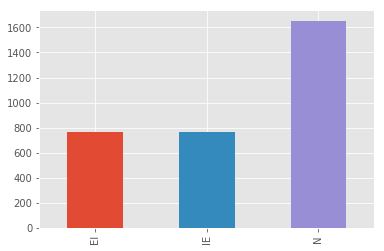

In [16]:
# Draw a bar chart to check the category
data['classes'].value_counts().sort_index().plot.bar()

In [17]:
# To check the category of the data
data_cat = data['classes'].astype('category')
c = data_cat.values
type(c)
c.categories

Index(['EI', 'IE', 'N'], dtype='object')

In [18]:
# Check the category of the data by classes
grouped = data.groupby('classes')
print(list(grouped))

# pd.unique(data['classes'])

[('EI',     classes             donor_numbers  \
0        EI          ATRINS-DONOR-521   
1        EI          ATRINS-DONOR-905   
2        EI          BABAPOE-DONOR-30   
3        EI         BABAPOE-DONOR-867   
4        EI        BABAPOE-DONOR-2817   
5        EI        CHPIGECA-DONOR-378   
6        EI        CHPIGECA-DONOR-903   
7        EI       CHPIGECA-DONOR-1313   
8        EI       GCRHBBA1-DONOR-1260   
9        EI       GCRHBBA1-DONOR-1590   
10       EI        GCRHBBA6-DONOR-461   
11       EI        GCRHBBA6-DONOR-795   
12       EI       GIBHBGGL-DONOR-2278   
13       EI       GIBHBGGL-DONOR-2624   
14       EI       GIBHBGGL-DONOR-7198   
15       EI       GIBHBGGL-DONOR-7544   
16       EI       HUMA1ATP-DONOR-1972   
17       EI       HUMA1ATP-DONOR-7932   
18       EI       HUMA1ATP-DONOR-9653   
19       EI      HUMA1ATP-DONOR-11057   
20       EI      HUMA1GLY2-DONOR-1693   
21       EI      HUMA1GLY2-DONOR-2251   
22       EI      HUMA1GLY2-DONOR-2540   
23      

In [19]:
# Split the data into the training and test set, 
# holding out 20% of the data to test the model.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_data,
                                                   test_size = 0.20,
                                                   random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)

(2552, 100842)
(638, 100842)


In [21]:
# A multinomial naive Bayes classifier will be used.
# The n-gram size of 4 and a model alpha of 0.1 did the best.
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [22]:
# Make a predictions on the test set.
y_pred = classifier.predict(X_test)

In [23]:
# Look at some model performances
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         EI       0.50      0.80      0.62       179
         IE       0.44      0.77      0.56       140
          N       0.73      0.24      0.36       319

avg / total       0.60      0.52      0.48       638



In [24]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [25]:
data_clf = DecisionTreeClassifier()
data_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
data_clf = data_clf.fit(X_train, y_train)
data_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
data_prediction = data_clf.predict(X_test)
data_prediction

array(['N', 'N', 'IE', 'N', 'IE', 'IE', 'N', 'N', 'EI', 'N', 'N', 'N',
       'EI', 'N', 'IE', 'N', 'IE', 'N', 'N', 'EI', 'N', 'N', 'N', 'N',
       'N', 'N', 'IE', 'N', 'IE', 'N', 'N', 'N', 'EI', 'N', 'N', 'IE',
       'EI', 'N', 'EI', 'N', 'N', 'N', 'N', 'N', 'EI', 'N', 'N', 'N',
       'EI', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'EI', 'N', 'N', 'N',
       'N', 'N', 'N', 'EI', 'IE', 'N', 'N', 'N', 'N', 'IE', 'N', 'N',
       'EI', 'N', 'EI', 'IE', 'N', 'N', 'N', 'IE', 'N', 'N', 'N', 'EI',
       'EI', 'N', 'N', 'IE', 'EI', 'N', 'IE', 'N', 'N', 'IE', 'N', 'EI',
       'N', 'N', 'EI', 'N', 'EI', 'N', 'N', 'N', 'EI', 'EI', 'N', 'IE',
       'N', 'N', 'EI', 'N', 'N', 'IE', 'N', 'IE', 'N', 'IE', 'IE', 'N',
       'EI', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'IE',
       'IE', 'N', 'N', 'N', 'IE', 'N', 'N', 'N', 'EI', 'EI', 'N', 'N',
       'IE', 'N', 'N', 'IE', 'N', 'EI', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'IE', 'IE', 'N', 'N', 'N', 'IE', 'EI', 'N', 'N'

In [28]:
print("Confusion matrix\n")
print("EI\tIE\tN")
print(confusion_matrix(y_test, data_prediction))

Confusion matrix

EI	IE	N
[[ 91  12  76]
 [  2  61  77]
 [ 16  25 278]]


In [29]:
print(classification_report(y_test, data_prediction))

             precision    recall  f1-score   support

         EI       0.83      0.51      0.63       179
         IE       0.62      0.44      0.51       140
          N       0.65      0.87      0.74       319

avg / total       0.69      0.67      0.66       638



In [30]:
# Random Forest Model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
randfc = RandomForestClassifier(n_estimators=10, max_features=3)
randfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
randfc.fit(X_train, y_train)
prediction = randfc.predict(X_test)
print(prediction == y_test)

[False False False False  True  True False  True  True  True  True False
  True  True False False False  True False  True  True  True False False
  True False False  True  True  True False  True  True False  True False
  True False  True  True  True  True  True  True False  True False  True
 False  True False  True  True  True  True  True False  True  True False
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True  True False False  True  True False  True False  True
  True  True  True  True  True False  True  True  True  True False  True
  True False False False False  True  True False  True  True False False
 False  True  True  True  True False False  True False  True  True  True
  True  True  True False  True  True  True False False False  True False
 False  True False False False False  True False  True  True False False
 False False  True False  True False False  True Fa

In [33]:
randfc.score(X_test, y_test)

0.6238244514106583

In [34]:
print(classification_report(prediction, y_test))

             precision    recall  f1-score   support

         EI       0.34      0.73      0.47        83
         IE       0.30      0.82      0.44        51
          N       0.92      0.59      0.72       504

avg / total       0.80      0.62      0.66       638



In [35]:
# Multiple Neural Networks
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [36]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
predictions = mlp.predict(X_test)

In [38]:
print("Confusion matrix\n")
print("EI\tIE\tN")
print(confusion_matrix(y_test, predictions))

Confusion matrix

EI	IE	N
[[109  10  60]
 [  9  82  49]
 [ 44  49 226]]


In [39]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

         EI       0.67      0.61      0.64       179
         IE       0.58      0.59      0.58       140
          N       0.67      0.71      0.69       319

avg / total       0.65      0.65      0.65       638

